# Student Marks Prediction using Decision Tree Regression

This notebook demonstrates how to build a machine learning model to predict student marks based on study hours, age, and internet availability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set plot style
sns.set(style="whitegrid")

## 1. Data Loading and Inspection

In [2]:
# Load the dataset
df = pd.read_csv('data.csv')

# Display first few rows
df.head()

,hours,age,internet,marks
0,6.83,15,1,78.50
1,6.56,16,0,76.74
2,NaN,17,1,78.68
3,5.67,18,0,71.82
4,8.67,19,1,84.19


In [3]:
# Check dataset info (columns, data types, null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hours     195 non-null    float64
 1   age       201 non-null    int64  
 2   internet  201 non-null    int64  
 3   marks     201 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 6.4 KB


In [4]:
# Check for missing values
print(df.isnull().sum())

hours       6
age         0
internet    0
marks       0
dtype: int64


## 2. Data Preprocessing
Handling missing values found in the 'hours' column. We will fill them with the mean.

In [5]:
# Fill missing 'hours' values with the mean
df['hours'] = df['hours'].fillna(df['hours'].mean())

# Verify no more missing values
print(df.isnull().sum())

hours       0
age         0
internet    0
marks       0
dtype: int64


## 3. Exploratory Data Analysis (EDA)

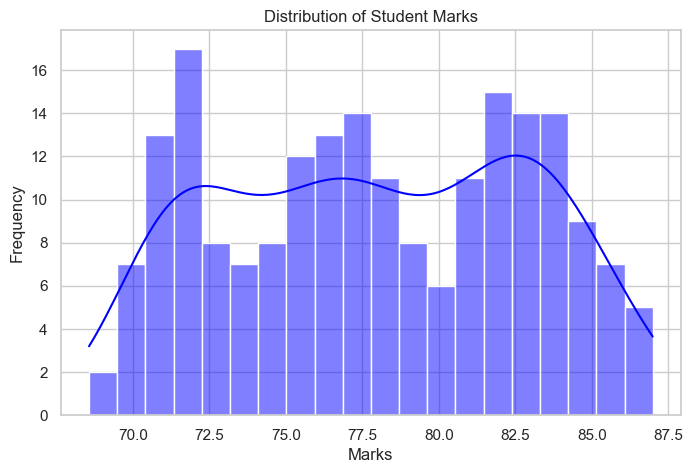

In [6]:
# Distribution of Marks
plt.figure(figsize=(8, 5))
sns.histplot(df['marks'], bins=20, kde=True, color='blue')
plt.title('Distribution of Student Marks')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.show()

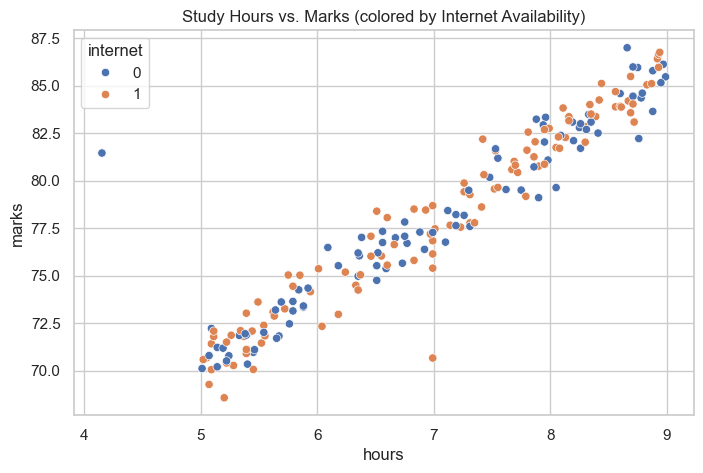

In [7]:
# Relationship between Study Hours and Marks
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='hours', y='marks', hue='internet')
plt.title('Study Hours vs. Marks (colored by Internet Availability)')
plt.show()

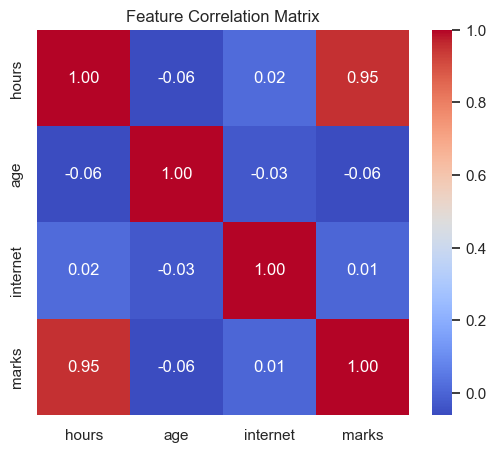

In [8]:
# Correlation Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

## 4. Model Training

In [9]:
# Separate features and target
X = df.drop('marks', axis=1)
y = df['marks']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)
print("Model training completed.")

Model training completed.


## 5. Model Evaluation

In [10]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Absolute Error (MAE): 1.26
Root Mean Squared Error (RMSE): 1.50
R-squared Score: 0.90


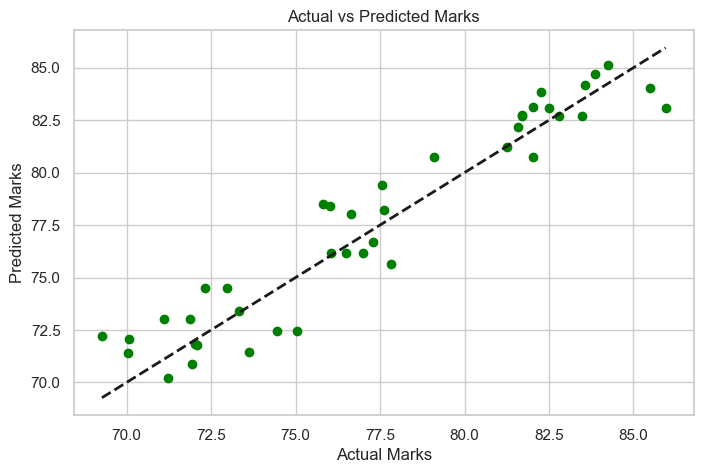

In [11]:
# Visualize Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual vs Predicted Marks')
plt.show()

## 6. Prediction System

In [14]:
def predict_marks(hours, age, internet):
    # Create a DataFrame for the input
    input_data = pd.DataFrame([[hours, age, internet]], columns=['hours', 'age', 'internet'])
    prediction = model.predict(input_data)
    return prediction[0]

# Example usage
test_hours = 7.5
test_age = 20
test_internet =0

predicted_mark = predict_marks(test_hours, test_age, test_internet)
print(f"Predicted Marks for {test_hours} hours study, age {test_age}, internet {test_internet}: {predicted_mark:.2f}")

Predicted Marks for 7.5 hours study, age 20, internet 0: 80.17
